In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils.utils import load_cifar10_data, create_cnn_model, generate_pseudo_labels, get_data_generator

In [2]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = load_cifar10_data()

# Ensure correct data types
x_train = x_train.astype(np.float32)
y_train = np.array(y_train).astype(np.int32)
x_test = x_test.astype(np.float32)
y_test = np.array(y_test).astype(np.int32)

# Verify shapes
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3), y_train shape: (50000,)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000,)


In [10]:
# Train teacher model
teacher_model = create_cnn_model()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
teacher_model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history_initial = teacher_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 33ms/step - accuracy: 0.3095 - loss: 2.1176 - val_accuracy: 0.5849 - val_loss: 1.1762
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.5741 - loss: 1.1992 - val_accuracy: 0.6610 - val_loss: 0.9719
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.6514 - loss: 1.0016 - val_accuracy: 0.7217 - val_loss: 0.7845
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.7012 - loss: 0.8658 - val_accuracy: 0.7445 - val_loss: 0.7495
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.7287 - loss: 0.7863 - val_accuracy: 0.7811 - val_loss: 0.6398
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7596 - loss: 0.7042 - val_accuracy: 0.7774 - val_loss: 0.6524
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7782 - loss: 0.6614 - val_accuracy: 0.7827 - val_loss: 0.6418
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.7869 -

In [4]:
# Generate pseudo labels
unlabeled_data = x_test[:5000]

datagen = get_data_generator(rotation_range=5, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

# Apply data augmentation to the training data
augmented_data_iter = datagen.flow(x_train, batch_size=len(x_train), shuffle=False)
augmented_data = next(augmented_data_iter)[0]
augmented_data = augmented_data.astype(np.float32)

# Ensure augmented_data has the correct dimensions
if len(augmented_data.shape) < 4:
    augmented_data = np.expand_dims(augmented_data, axis=0)

In [5]:
# Generate pseudo-labels for the unlabeled data
pseudo_labels = generate_pseudo_labels(teacher_model, unlabeled_data)

# Generate pseudo-labels for augmented data
pseudo_labels_augmented = generate_pseudo_labels(teacher_model, augmented_data)

# Combine the labeled, pseudo-labeled, and augmented data
combined_x = np.concatenate((x_train, unlabeled_data, augmented_data))
combined_y = np.concatenate((y_train, pseudo_labels, pseudo_labels_augmented))

# Verify combined data shape
print(f'combined_x shape: {combined_x.shape}, combined_y shape: {combined_y.shape}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━

In [7]:
# Train student model
student_model = create_cnn_model()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
student_model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  
history_combined = student_model.fit(datagen.flow(combined_x, combined_y, batch_size=64), epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50
  2/860 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.1094 - loss: 3.6428

/Users/stahlma/Desktop/Studium/Deep_Learning/Code/ssl-examples/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


860/860 ━━━━━━━━━━━━━━━━━━━━ 51s 58ms/step - accuracy: 0.2779 - loss: 2.2432 - val_accuracy: 0.5408 - val_loss: 1.2785
Epoch 2/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.5091 - loss: 1.3571 - val_accuracy: 0.5716 - val_loss: 1.1883
Epoch 3/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.6060 - loss: 1.1228 - val_accuracy: 0.6192 - val_loss: 1.1352
Epoch 4/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - accuracy: 0.6539 - loss: 0.9959 - val_accuracy: 0.7179 - val_loss: 0.8104
Epoch 5/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.6917 - loss: 0.8993 - val_accuracy: 0.6983 - val_loss: 0.8820
Epoch 6/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - accuracy: 0.7161 - loss: 0.8287 - val_accuracy: 0.7209 - val_loss: 0.8355
Epoch 7/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.7325 - loss: 0.7887 - val_accuracy: 0.7332 - val_loss: 0.8066
Epoch 8/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - accuracy: 0.7444 - loss: 0.7470 - val_accurac

In [8]:
# Evaluate student model
test_loss, test_acc = student_model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 - 2s - 7ms/step - accuracy: 0.8529 - loss: 0.4391
Test accuracy: 85.29%


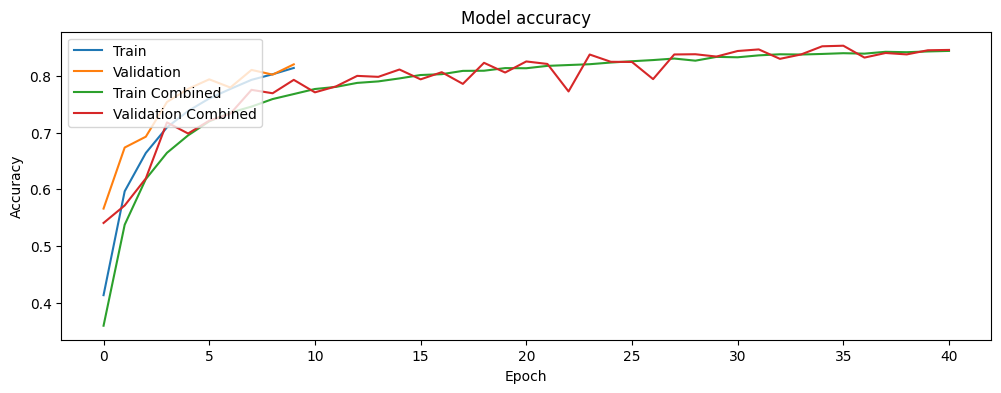

In [9]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.plot(history_initial.history['accuracy'])
plt.plot(history_initial.history['val_accuracy'])
plt.plot(history_combined.history['accuracy'])
plt.plot(history_combined.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Train Combined', 'Validation Combined'], loc='upper left')

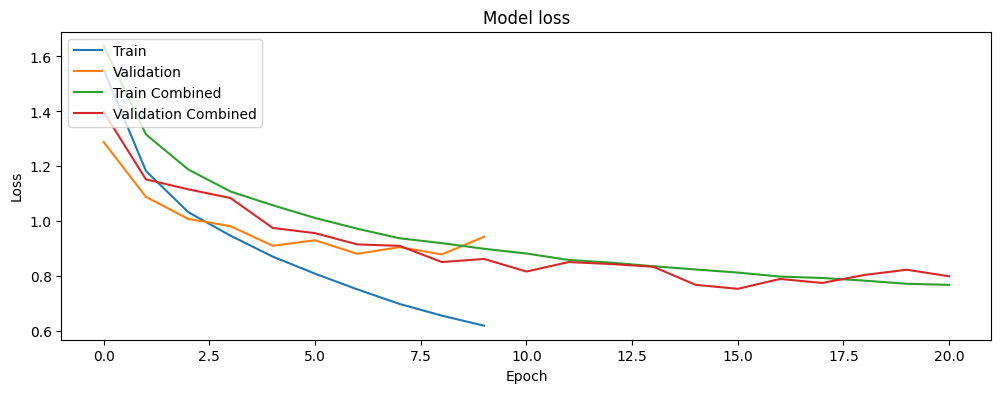

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(history_initial.history['loss'])
plt.plot(history_initial.history['val_loss'])
plt.plot(history_combined.history['loss'])
plt.plot(history_combined.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Train Combined', 'Validation Combined'], loc='upper left')